In [1]:
# Import standard libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [41]:
df = pd.read_csv("data/FIFA_Clean.csv", parse_dates=["birth_date"])
X = df.select_dtypes(exclude=["object", "datetime64[ns]"])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 81 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   body_lean                      17954 non-null  int64  
 1   body_normal                    17954 non-null  int64  
 2   body_other                     17954 non-null  int64  
 3   body_stocky                    17954 non-null  int64  
 4   foot_Right                     17954 non-null  int64  
 5   work_rate_atk                  17954 non-null  int64  
 6   work_rate_def                  17954 non-null  int64  
 7   GK_diving                      17954 non-null  int64  
 8   GK_handling                    17954 non-null  int64  
 9   GK_kicking                     17954 non-null  int64  
 10  GK_positioning                 17954 non-null  int64  
 11  GK_reflexes                    17954 non-null  int64  
 12  acceleration                   17954 non-null 

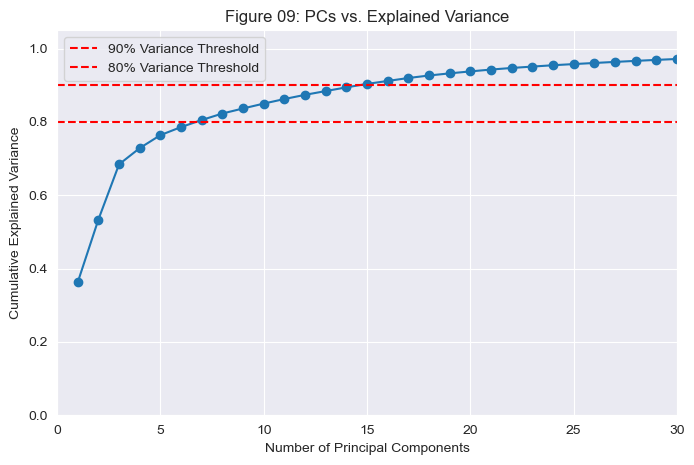

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Fit PCA
pca = PCA()
pca.fit(X_scaled)

# Step 3: Compute cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Step 4: Plot n_components vs cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Figure 09: PCs vs. Explained Variance')
plt.grid(True)

plt.xlim(0, 30)
plt.ylim(0, 1.05)
plt.axhline(y=0.90, color='red', linestyle='--', label='90% Variance Threshold')
plt.axhline(y=0.80, color='red', linestyle='--', label='80% Variance Threshold')

plt.legend()
plt.show()

In [47]:
# PCA Fit
from statsmodels.multivariate.pca import PCA
pca_real = PCA(data=X, ncomp=7, standardize=True, demean=True, normalize=True)

In [71]:
#del PCA
pca_df = pd.concat(objs=[X, pca_real.factors], axis=1)
pca_df.corr()["comp_6"].sort_values(ascending=False)

comp_6                           1.000000
age                              0.513247
international_reputation(1-5)    0.326690
body_lean                        0.246320
balance                          0.238014
                                   ...   
weight_kgs                      -0.245732
club_jersey_number              -0.265023
body_normal                     -0.281875
potential                       -0.324737
id                              -0.545167
Name: comp_6, Length: 88, dtype: float64

In [56]:
loadings_df = pca_real.coeff
loadings_df

,body_lean,body_normal,body_other,body_stocky,foot_Right,work_rate_atk,work_rate_def,GK_diving,GK_handling,GK_kicking,...,ST,RS,LS,LF,RF,club_jersey_number,release_clause_euro,value_euro,wage_euro,club_rating
comp_0,5.783920,-6.334479,6.975621,0.894210,-14.675177,50.780335,4.191050,-63.132424,-62.937725,-62.513653,...,102.818951,102.818951,102.818951,107.397630,107.397630,-16.682883,67.495952,68.761739,63.232756,57.624505
comp_1,-18.388929,16.357914,-0.985391,3.233934,-4.088404,-35.795725,61.384473,5.008143,4.999014,4.692413,...,-43.979689,-43.979689,-43.979689,-44.469039,-44.469039,-23.402312,16.293393,16.486703,20.307044,24.783600
comp_2,-14.998079,13.354145,6.436979,2.011955,11.040954,5.181694,-9.999149,113.791647,113.852818,113.592825,...,62.658292,62.658292,62.658292,64.141100,64.141100,-5.909625,36.881546,37.333183,34.364735,38.321372
comp_3,-40.040048,27.723069,17.100930,21.798776,17.528903,-15.385136,-5.101829,-7.834425,-7.625729,-7.959275,...,20.111487,20.111487,20.111487,-4.707052,-4.707052,-12.367315,45.460662,46.392680,48.785829,25.447136
comp_4,48.426061,-42.465892,29.091475,-11.977381,-3.902233,1.522595,1.248946,-1.131391,-1.481456,-2.071881,...,-14.788507,-14.788507,-14.788507,-8.470667,-8.470667,22.770210,82.492993,81.110615,73.496381,62.697578
comp_5,-97.096522,107.144599,11.709833,-27.347351,-1.539815,18.022951,1.829401,5.098517,4.597085,4.607223,...,-5.365205,-5.365205,-5.365205,-2.317515,-2.317515,-13.322156,16.482540,16.776120,15.461077,-2.586488
comp_6,33.005075,-37.769200,30.852434,9.204429,-4.975689,-4.838342,-2.494573,6.752713,7.227150,6.908573,...,-13.179067,-13.179067,-13.179067,-7.981925,-7.981925,-35.511160,16.118598,17.375084,27.447999,-24.973340


In [73]:
loadings_df.to_csv("data/FIFA_PCA_Loadings.csv", index=False)

* PC1 shares strong positive correlations (r>= 0.8) with ball control, dribbling, passing, crossing, and various mid-field offensive positions.
* PC2 shares strong positive correlations (r>= 0.84) with center-back and defensive mid-field positions.  Interceptions and tackles are also highly correlated.
* PC3 weights goalkeeping skills of handling, reflexes, diving, kicking, and positioning above all others, and shares strong positive correlations with each (r >= 0.84).
* PC4 shares a moderate positive correlation with strength (r = 0.63) and weight (r = 0.59).
* PC5 weights player value and potential the highest, but is only mildy correlated.
* PC6 seems rather unremarkable, aside from the weight it places on normal body types.